In [1]:
import cv2
import numpy as np
from pathlib import Path
import trackpy as tp
import pandas as pd
from pandas import DataFrame, Series

In [2]:
video = "/Users/wheelenj/GitHub/invision-tools/testing/20250822a02sao_20250822_151916.25128038_000000.mp4"
output = "/Users/wheelenj/GitHub/invision-tools/testing/20250822a02sao_out/"

base = Path(output).stem

worm_vid = cv2.VideoCapture(video)
# num_frames = int(worm_vid.get(cv2.CAP_PROP_FRAME_COUNT))
num_frames = 1000
ret, frame = worm_vid.read()
if ret == True:
    frame_shape = frame.shape
# Reset the video capture to the first frame
worm_vid.set(cv2.CAP_PROP_POS_FRAMES, 0)
worm_arr = np.zeros((num_frames, frame_shape[0], frame_shape[1]), np.uint8)
for i in range(num_frames):
    if i % 50 == 0:
        print(f"Loading frame {i} to memory.")
    ret, frame = worm_vid.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    worm_arr[i] = frame

Loading frame 0 to memory.
Loading frame 50 to memory.
Loading frame 100 to memory.
Loading frame 150 to memory.
Loading frame 200 to memory.
Loading frame 250 to memory.
Loading frame 300 to memory.
Loading frame 350 to memory.
Loading frame 400 to memory.
Loading frame 450 to memory.
Loading frame 500 to memory.
Loading frame 550 to memory.
Loading frame 600 to memory.
Loading frame 650 to memory.
Loading frame 700 to memory.
Loading frame 750 to memory.
Loading frame 800 to memory.
Loading frame 850 to memory.
Loading frame 900 to memory.
Loading frame 950 to memory.


In [6]:
i = 0
chunk = 25
for frame in worm_arr:
    if i % chunk == 0:
        print(f"Processing frame {i}")
        print(f"Regenerating background using frames {i} to {i+chunk}.")
        background = np.amax(worm_arr[i : i + chunk, :, :], axis=0)
        save_path = Path(output, f"background_{chunk}.png")
    arr = np.absolute((frame - background).astype(np.int8))
    worm_arr[i] = arr
    i += 1


Processing frame 0
Regenerating background using frames 0 to 25.
Processing frame 25
Regenerating background using frames 25 to 50.
Processing frame 50
Regenerating background using frames 50 to 75.
Processing frame 75
Regenerating background using frames 75 to 100.
Processing frame 100
Regenerating background using frames 100 to 125.
Processing frame 125
Regenerating background using frames 125 to 150.
Processing frame 150
Regenerating background using frames 150 to 175.
Processing frame 175
Regenerating background using frames 175 to 200.
Processing frame 200
Regenerating background using frames 200 to 225.
Processing frame 225
Regenerating background using frames 225 to 250.
Processing frame 250
Regenerating background using frames 250 to 275.
Processing frame 275
Regenerating background using frames 275 to 300.
Processing frame 300
Regenerating background using frames 300 to 325.
Processing frame 325
Regenerating background using frames 325 to 350.
Processing frame 350
Regenerating

In [ ]:
from IPython.display import clear_output
import logging

# Remove IPythonStreamHandler if present
for handler in tp.logger.handlers[:]:
    if handler.__class__.__name__ == "IPythonStreamHandler":
        tp.logger.removeHandler(handler)

# Add a standard stream handler if not present
if not any(isinstance(h, logging.StreamHandler) for h in tp.logger.handlers):
    tp.logger.addHandler(logging.StreamHandler())

diameter = 25
minmass = 400
noise_size = 2
topn = None

t = tp.batch(worm_arr, diameter=diameter, minmass=minmass, topn=topn, noise_size=noise_size)


Frame 0: 5109 features
Frame 1: 4055 features
Frame 2: 3865 features
Frame 3: 3844 features
Frame 4: 3832 features
Frame 5: 3827 features
Frame 6: 3739 features
Frame 7: 3752 features
Frame 8: 3822 features
Frame 9: 3908 features
Frame 10: 3812 features
Frame 11: 3824 features
Frame 12: 3906 features
Frame 13: 3858 features
Frame 14: 3777 features
Frame 15: 3830 features
Frame 16: 3812 features
Frame 17: 3699 features
Frame 18: 3748 features
Frame 19: 3827 features
Frame 20: 3834 features
Frame 21: 3791 features
Frame 22: 3778 features
Frame 23: 3846 features
Frame 24: 3833 features
Frame 25: 3766 features
Frame 26: 3839 features
Frame 27: 3792 features
Frame 28: 3710 features
Frame 29: 3727 features
Frame 30: 3604 features
Frame 31: 3757 features
Frame 32: 3731 features
Frame 33: 3839 features
Frame 34: 3793 features
Frame 35: 3779 features
Frame 36: 3758 features
Frame 37: 3684 features
Frame 38: 3680 features
Frame 39: 3759 features
Frame 40: 3851 features
Frame 41: 3871 features
Fr

In [27]:
search_range = 45
memory = 25
adaptive_stop = 15

t1 = tp.link(
        t, search_range=search_range, memory=memory, adaptive_stop=adaptive_stop
    )

Frame 1: 52 trajectories present.
Frame 2: 38 trajectories present.


Frame 3: 33 trajectories present.
Frame 4: 37 trajectories present.
Frame 5: 37 trajectories present.
Frame 6: 34 trajectories present.
Frame 7: 34 trajectories present.
Frame 8: 40 trajectories present.
Frame 9: 29 trajectories present.
Frame 10: 48 trajectories present.
Frame 11: 38 trajectories present.
Frame 12: 55 trajectories present.
Frame 13: 47 trajectories present.
Frame 14: 50 trajectories present.
Frame 15: 38 trajectories present.
Frame 16: 27 trajectories present.
Frame 17: 18 trajectories present.
Frame 18: 13 trajectories present.
Frame 19: 17 trajectories present.
Frame 20: 17 trajectories present.
Frame 21: 17 trajectories present.
Frame 22: 11 trajectories present.
Frame 23: 22 trajectories present.
Frame 24: 17 trajectories present.
Frame 25: 44 trajectories present.
Frame 26: 44 trajectories present.
Frame 27: 36 trajectories present.
Frame 28: 50 trajectories present.
Frame 29: 34 trajectories present.
Frame 30: 25 trajectories present.
Frame 31: 27 trajectories p

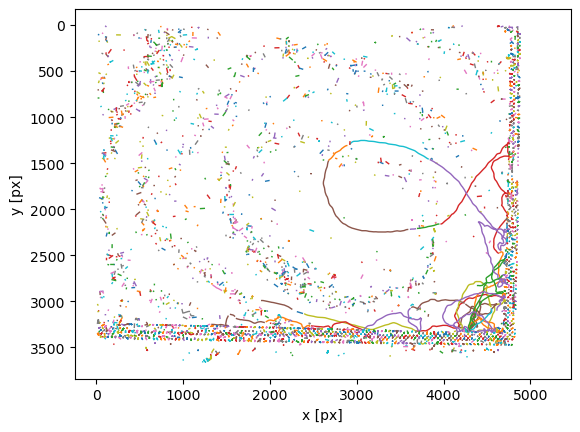

<Axes: xlabel='x [px]', ylabel='y [px]'>

In [28]:
import matplotlib.pyplot as plt

plt.figure()
tp.plot_traj(t1)

In [ ]:
import argparse
import matplotlib as mlp
import matplotlib.pyplot as plt




import os
from skimage.filters import gaussian
from skimage.exposure import rescale_intensity, adjust_gamma


########################################################################
####                                                                ####
####                             tracking                           ####
####                                                                ####
########################################################################


# convert RGB image to greyscale uint8
def rgb2gray(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    return gray.astype(np.uint8)


def process_frame(frame, background):
    # gray = rgb2gray(frame)
    sub = np.absolute((frame - background).astype(np.int8))
    # rescale = rescale_intensity(sub, out_range=(0, 255))
    # inv = (255 - rescale).astype(np.uint8)
    # smooth = gaussian(sub, sigma=5, preserve_range=True)

    return sub


def crop(frame, l, r, t, b):

    cropped = frame[t:-b, l:-r]

    return cropped


def track_batch(video, output):
    base = Path(output).stem
    os.makedirs(output, exist_ok=True)

    worm_vid = cv2.VideoCapture(video)
    num_frames = int(worm_vid.get(cv2.CAP_PROP_FRAME_COUNT))

    ret, frame = worm_vid.read()
    if ret == True:
        frame_shape = frame.shape

    # Reset the video capture to the first frame
    worm_vid.set(cv2.CAP_PROP_POS_FRAMES, 0)

    worm_arr = np.zeros((num_frames, frame_shape[0], frame_shape[1]), np.uint8)
    for i in range(num_frames):

        if i % 50 == 0:
            print(f"Loading frame {i} to memory.")
        ret, frame = worm_vid.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        worm_arr[i] = frame

    if "planaria" not in output:
        i = 0
        chunk = 25
        for frame in worm_arr:
            if i % chunk == 0:
                print(f"Processing frame {i}")
                print(f"Regenerating background using frames {i} to {i+chunk}.")
                background = np.amax(worm_arr[i : i + chunk, :, :], axis=0)
                save_path = Path(output, f"background_{chunk}.png")
                cv2.imwrite(str(save_path), background)
            arr = process_frame(frame, background)
            worm_arr[i] = arr
            if i % 450 == 0:
                save_path = Path(output, f"{base}_{i}.png")
                cv2.imwrite(str(save_path), arr)
            i += 1
        if "miracidia" in output:
            diameter = 35
            minmass = 1200
            noise_size = 2
            topn = None
            with tp.PandasHDFStoreBig(Path(output, f"{base}.hdf5")) as s:
                tp.batch(worm_arr, diameter=diameter, minmass=minmass, topn=topn, noise_size=noise_size, output=s)
        elif "mosquito" in output:
            diameter = 95
            minmass = 50000
            with tp.PandasHDFStoreBig(Path(output, f"{base}.hdf5")) as s:
                tp.batch(worm_arr, diameter=diameter, minmass=minmass, output=s)
        else:
            print("Something went wrong.")
    else:
        diameter = 83
        minmass = 148000

        with tp.PandasHDFStoreBig(Path(output, f"{base}.hdf5")) as s:
            tp.batch(worm_arr, diameter=diameter, minmass=minmass, output=s)

if __name__ == "__main__":

    parser = argparse.ArgumentParser(description="Track objects in an InVision video.")

    parser.add_argument("video", type=str, help="Path to the video.")
    parser.add_argument("output", type=str, help="Path to the output directory.")
    # parser.add_argument('-l', '--left', type=int,
    #                     help='Number of cols to remove from the left.')
    # parser.add_argument('-r', '--right', type=int,
    #                     help='Number of cols to remove from the right.')
    # parser.add_argument('-t', '--top', type=int,
    #                     help='Number of cols to remove from the top.')
    # parser.add_argument('-b', '--bottom', type=int,
    #                     help='Number of cols to remove from the bottom.')
    args = parser.parse_args()

    track_batch(args.video, args.output)
